In [268]:
import numpy as np
import matplotlib.pyplot as plt 
import import_ipynb
from FCorrelación_parcial import lcorr
import bioread

- - -

    1. La información contenida en el archivo “signal.txt” contiene parte de la señal de EMG del archivo “datosEMG.acq” atenuada, desplazada y con mucho ruido. Determina la ubicación de esa parte de señal en el EMG.

In [269]:
#Importar las señales
stotal = bioread.read_file('datosEMG.acq')
señal = np.loadtxt('signal.txt')

In [270]:
stotal.channels #Samples por segundo es la frecuencia de muestro

[Channel EMG (30 - 500 Hz): 240000 samples, 2000.0 samples/sec, loaded: True]

### N: 240000 son los datos que tiene.

### Fs: 2000 la frecuencia con la que fue muestreada la señal.

In [271]:
señal.shape

(240000,)

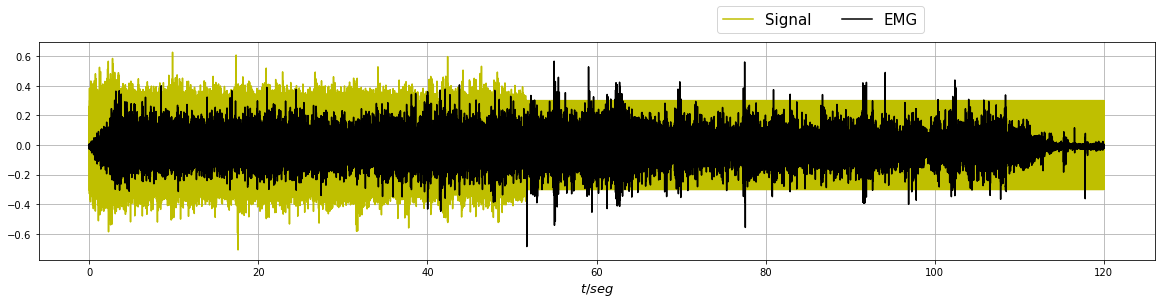

In [272]:
N = 240000
Fs = 2000

Emg = stotal.channels[0].data 

n = np.arange (len(Emg))
t = n/Fs

plt.figure(figsize=(20,4))
plt.plot(t,señal,color='y')
plt.plot(t,Emg,color='k')
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(('Signal',"EMG"),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

In [273]:
#Correlación Parcial
r = lcorr (señal,Emg)

In [274]:
np.where (r[:,1] == np.max (r[:,1])) #Encontrar el máximo de amplitud

(array([120000]),)

In [275]:
n1 = np.arange (120000,(len(n)+120000))
len (n1)

240000

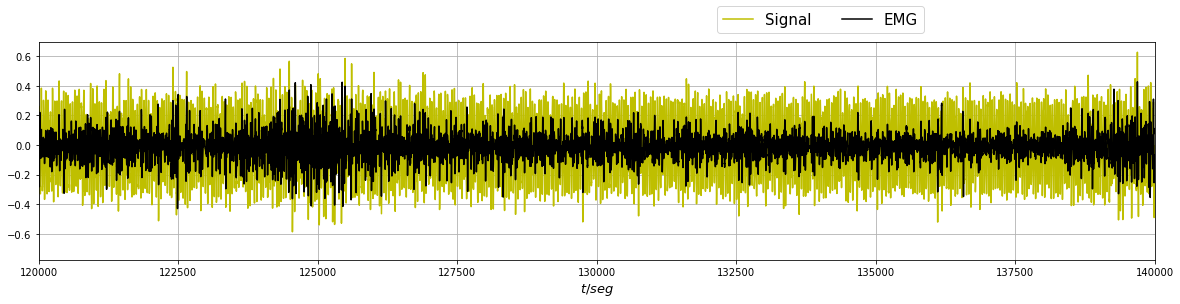

In [276]:
plt.figure(figsize=(20,4))
plt.plot(n1,señal,color='y')
plt.plot(n,Emg,color='k')
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(('Signal',"EMG"),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.xlim (120000,140000)
plt.show()

- - -

### SI CONSIDERAMOS SACAR EL FILTO DE 50 HZ.

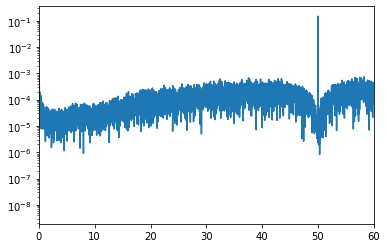

In [277]:
from scipy.fftpack import fft, fftfreq, ifft
S = fft (señal)/N
n50 = np.arange (len(S))

plt.semilogy (n50*Fs/N,abs(S)) #escala semilogaritmica para ver el espectro
plt.xlim (0,60)
plt.show()

#### En la gráfica se puede observar ese pico a la altura de 50, demostrando que en la señal hay presencia del ruido de 50 Hz.

In [278]:
#Calculamos a qué muestra corresponde los 50 Hz.
50*N/Fs

6000.0

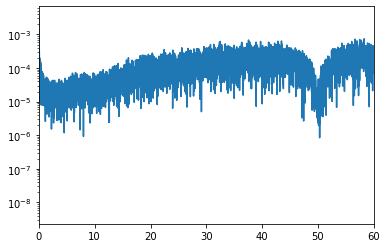

In [279]:
S1 = np.copy (S) #Para no tocar el espectro original
S1 [6000] = 1e-5
S1 [N-6000] = 1e-5 #Porque el espectro es simétrico



plt.semilogy (n50*Fs/N,abs(S1)) #escala semilogaritmica para ver el espectro
plt.xlim (0,60)
plt.show()

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


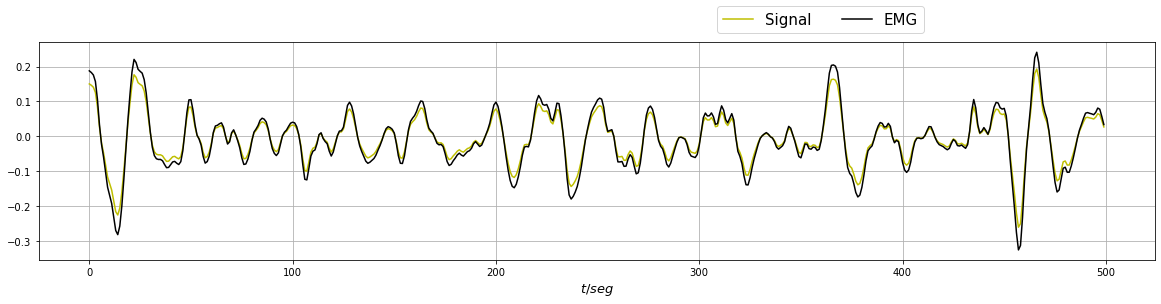

In [280]:
signal = ifft (S1)*N #Para reconstuir la señal a partir del espectro.

emg = Emg [120000:120500]

plt.figure(figsize=(20,4))
plt.plot(n[0:500],signal [0:500] ,color='y')
plt.plot(n[0:500],emg,color='k')
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(('Signal',"EMG"),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

- - -

    2. La información contenida en el archivo “patron.txt” representa un patrón que se trata de buscar dentro de otra señal, almacenada en el archivo “señal.txt”. Sabiendo que tanto el patrón como la señal fueron muestreados a 100 Hz, determina la ubicación del patrón dentro de la señal.

In [281]:
#Importamos señales
señal2 = np.loadtxt('señal.txt')
patron = np.loadtxt('patron.txt')

In [282]:
señal2.shape , patron.shape

((4000,), (4000,))

In [283]:
N2 = 4000
Fs2 = 100

n2 = np.arange (len(señal2))
t2 = n2/Fs2

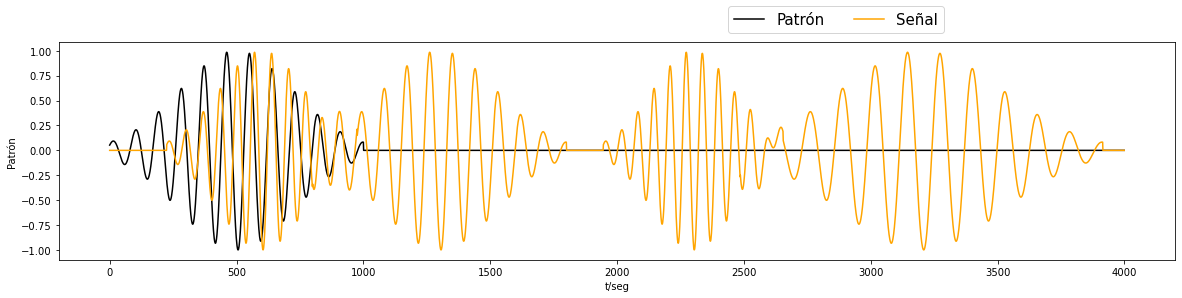

In [284]:
plt.figure(figsize=(20,4))
plt.plot(n2,patron,'black')
plt.plot (n2,señal2,"orange")
plt.xlabel('t/seg')
plt.ylabel('Patrón')
plt.legend(('Patrón','Señal'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.show()

In [285]:
R2 = lcorr (patron,señal2)

#El patrón es el que se desplaza y la Señal2 queda FIJO. 

### --> ES DECIR QUE EN LA CORRELACIÓN PRIMERO SE PONE LA FUNCIÓN QUE SE DESPLAZA!!!

In [286]:
np.where (R2[:,1] == np.max (R2[:,1])) #Encontrar el máximo de amplitud

#Cuánto hay que desplazar para que se superpongan las señales.

(array([800]),)

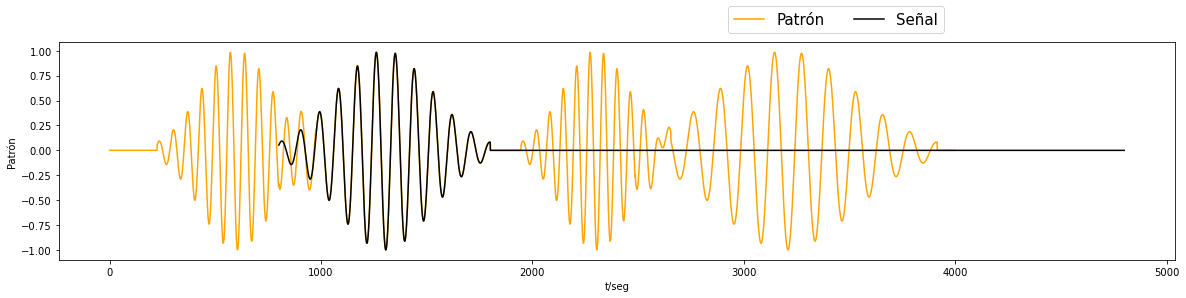

In [287]:
plt.figure(figsize=(20,4))
plt.plot (n2,señal2,"orange")
plt.plot(n2+800,patron,'black')
plt.xlabel('t/seg')
plt.ylabel('Patrón')
plt.legend(('Patrón','Señal'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.show()

- - -

    3. A una señal senoidal le sumamos un Ruido Gaussiano y calculamos la Relación S/N del espectro. Luego aplicamos autocorrelación y volvemos a calcula la Relación S/N y debería dar menor.

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FCorrelación_parcial import lcorr
import bioread
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FReconstrucciondeseñalesapartirdemuestras import h
from FTransformaciones_tf_de_una_señal_no_periodica import EspecCont
from sympy import integrate, init_printing
from sympy.abc import x,y,z,w,n,a,b,c,d
from sympy import cos, sin, pi, exp
from random import gauss

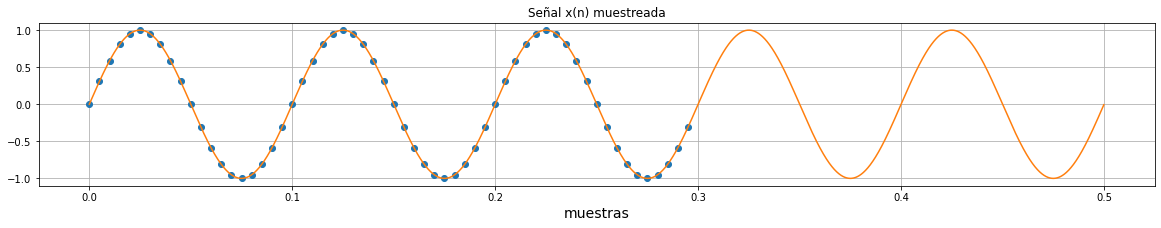

In [289]:
from random import gauss

Fs3 = 200
t3 = np.arange(0,0.50,0.0001)
xt3 = 1*np.sin(2*np.pi*10*t3)
n3 = np.arange(0,60)
xn3 = 1*np.sin(2*np.pi*10*n3/Fs3)


plt.figure(figsize=(20,3))
plt.title('Señal x(n) muestreada')
plt.plot(n3/Fs3,xn3,'o')
plt.plot(t3,xt3)
plt.grid()
plt.xlabel('muestras', fontsize=14)
plt.show()

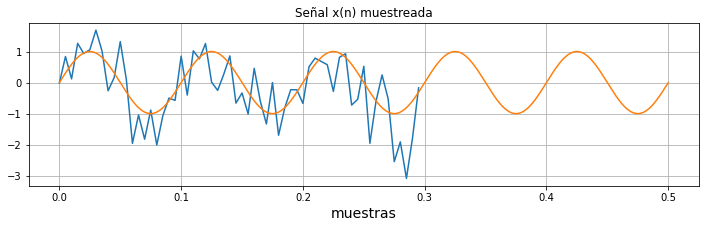

In [290]:
noise = np.random.normal(0,0.8,60)
x_Noise=xn3+noise

plt.figure(figsize=(12,3))
plt.title('Señal x(n) muestreada')
plt.plot(n3/Fs3,x_Noise)
plt.plot(t3,xt3)
plt.grid()
plt.xlabel('muestras', fontsize=14)
plt.show()

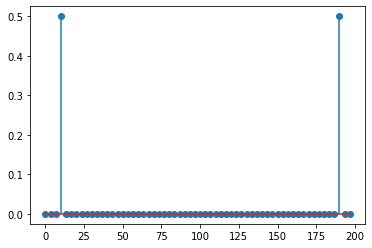

In [291]:
Espec= fft(xn3)/60
n_3 = np.arange(len(Espec))

plt.stem(n_3*Fs3/60,abs(Espec))
plt.show()

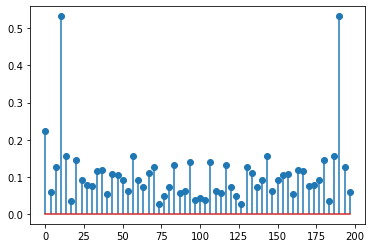

In [292]:
Espec= fft(x_Noise)/60

plt.stem(n_3*Fs3/60,abs(Espec))
plt.show()

In [293]:
10*60/Fs
A=abs(Espec[3]) # Corresponde A en la relacion señal ruido
print (A)

Espec[3] = 1e-5
Espec[60-3] = 1e-5
#Corresponde B en la relacion señal ruido
B=max(abs(Espec))
print (B)

SN=20*np.log(A/B)
print (f"La relación Señal-Ruido: {SN}")

0.5325640381486176
0.22428431983970942
La relación Señal-Ruido: 17.295772355889714


In [294]:
R=lcorr(x_Noise,x_Noise)/60
len(R)

60

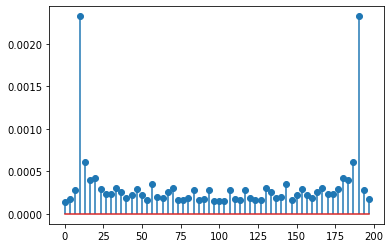

In [295]:
Espec2= fft(R[:,1])/60
plt.stem(n_3*Fs3/60,abs(Espec2))
#plt.xlim(0,60)
plt.show()

In [296]:
A2=abs(Espec2[3]) # Corresponde A en la relacion señal ruido
print (A2)

Espec2[3] = 1e-5
Espec2[60-3] = 1e-5
#Corresponde B en la relacion señal ruido
B2=max(abs(Espec2))
print (B2)


SN2=20*np.log(A2/B2)
print (f"La relación Señal-Ruido nueva es: {SN2}")

0.002324128764291864
0.0006059613486393653
La relación Señal-Ruido nueva es: 26.885686396933522


- - -